In [2]:
import sys
sys.path.append('il_pedagogical')

import il_pedagogical as ilp
import il_parse as ila
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
pd.options.display.float_format = '{:.0f}'.format

ini_pool_size = [25, 50, 75, 100]
plt.rcParams.update({'font.size': 14})
sns.set(style="white", palette="deep", color_codes=True, font_scale=1.5)
sns.set(style="white", palette="deep", color_codes=True, font_scale=1.5)



# Gaussian Potential

Look at imoprtance learning results for a Gaussian potential

## Distribution of $E_a$

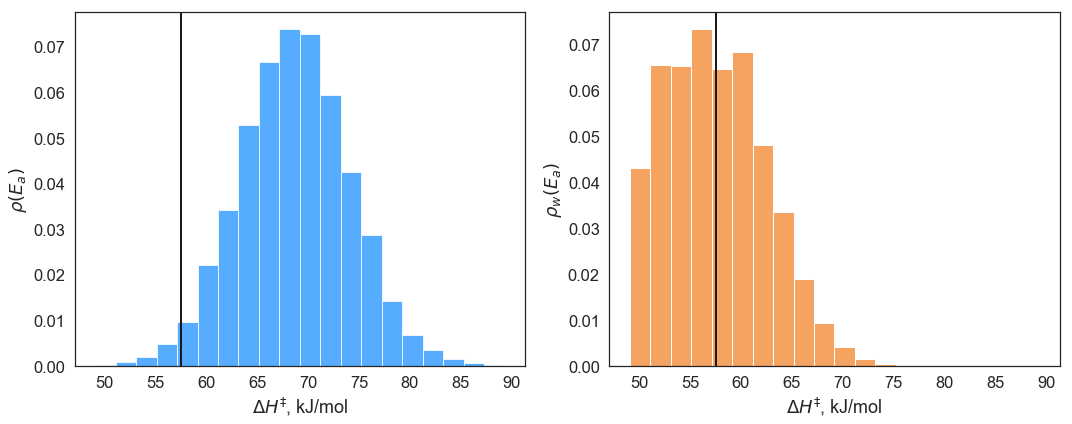

In [4]:
il_morse = ila.Parser('logs/morse_potential_50.json')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ilp.histogram(ax1, ax2, il_morse.true_barrier_heights(), il_morse.T(),n_bins=20)
ax1.set_xlabel(r'$E_a$, kJ/mol')
ax2.set_xlabel(r'$E_a$, kJ/mol')

ax1.set_xlabel(r'$\Delta H^\ddag$, kJ/mol')
ax2.set_xlabel(r'$\Delta H^\ddag$, kJ/mol')


fig.tight_layout()
plt.show()

## Training the metric learning model, 0th iteration

### Model barriers predicted on the initial pool

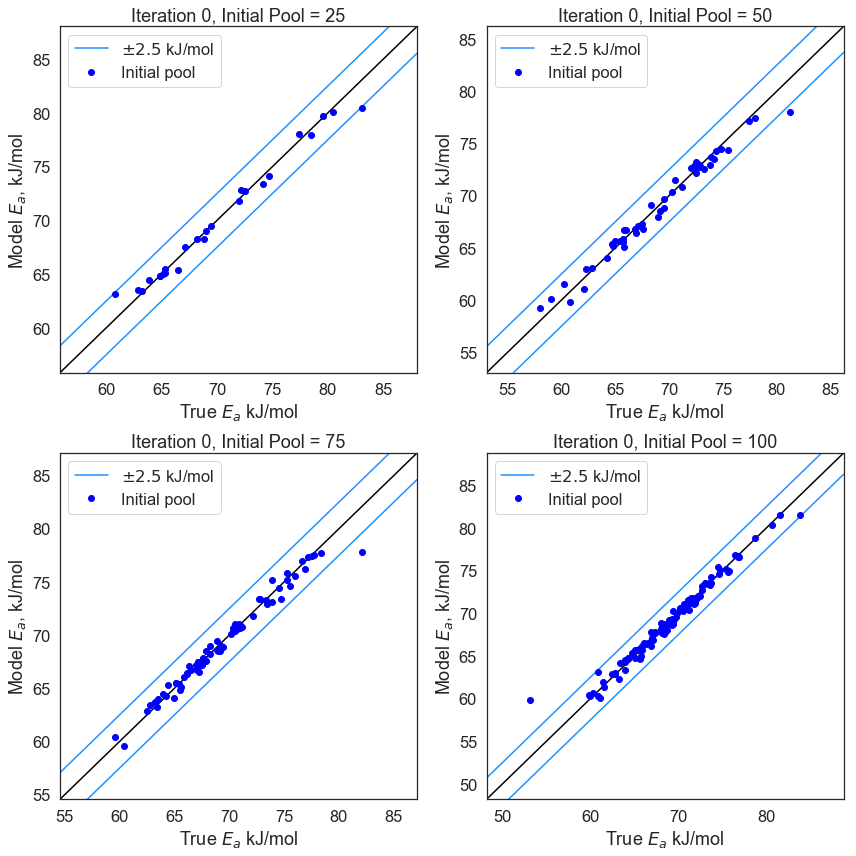

In [5]:
fig = plt.figure(figsize=(12,12))

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    il_gaussian = ila.Parser('logs/morse_potential_{}.json'.format(ini_pool_size[i]))
    model_heights = il_gaussian.model_training_barrier_heights(0)
    initial_pool = il_gaussian.sampled_sites(0)
    true_barriers = il_gaussian.true_barrier_heights()
#     print(true_barriers[initial_pool])
    plt.title('Iteration 0, Initial Pool = {}'.format(ini_pool_size[i]))
    ilp.plot_trained(ax, model_heights, true_barriers[initial_pool], 2.5, ini_pool_size[i])

plt.tight_layout()
plt.show()

### Distribution of residuals

Mostly Gaussian

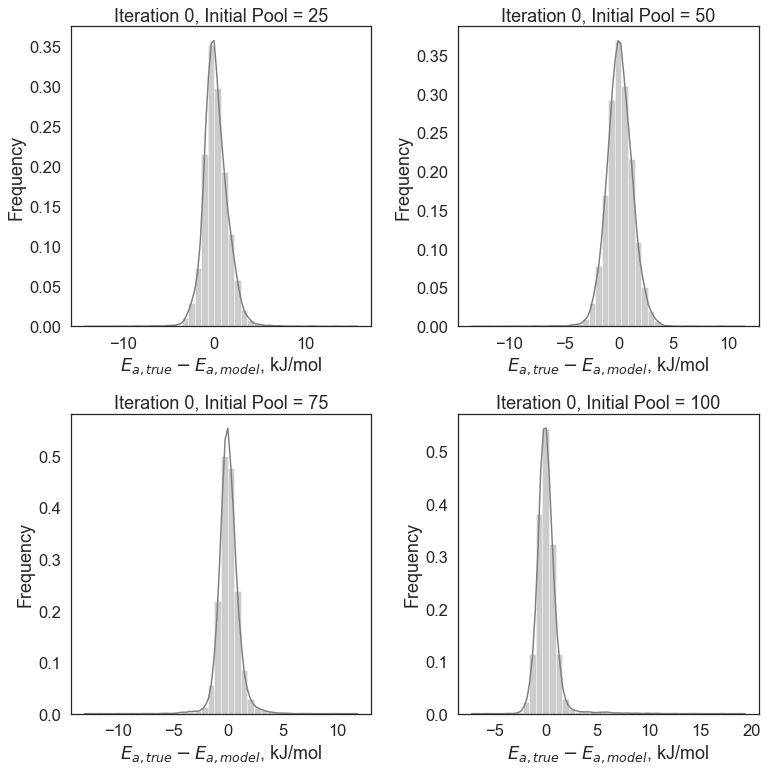

In [36]:
plt.rcParams['figure.figsize'] = 11, 11
fig = plt.figure()

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    il_gaussian = ila.Parser('logs/morse_potential_{}.json'.format(ini_pool_size[i]))
    model_heights = il_gaussian.model_barrier_heights(0)
    initial_pool = il_gaussian.sampled_sites(0)
    true_barriers = il_gaussian.true_barrier_heights()
    ilp.plot_residuals(ax, true_barriers, model_heights)
    plt.title('Iteration 0, Initial Pool = {}'.format(ini_pool_size[i]))

plt.tight_layout()
plt.show()

## Importance Learning Convergence

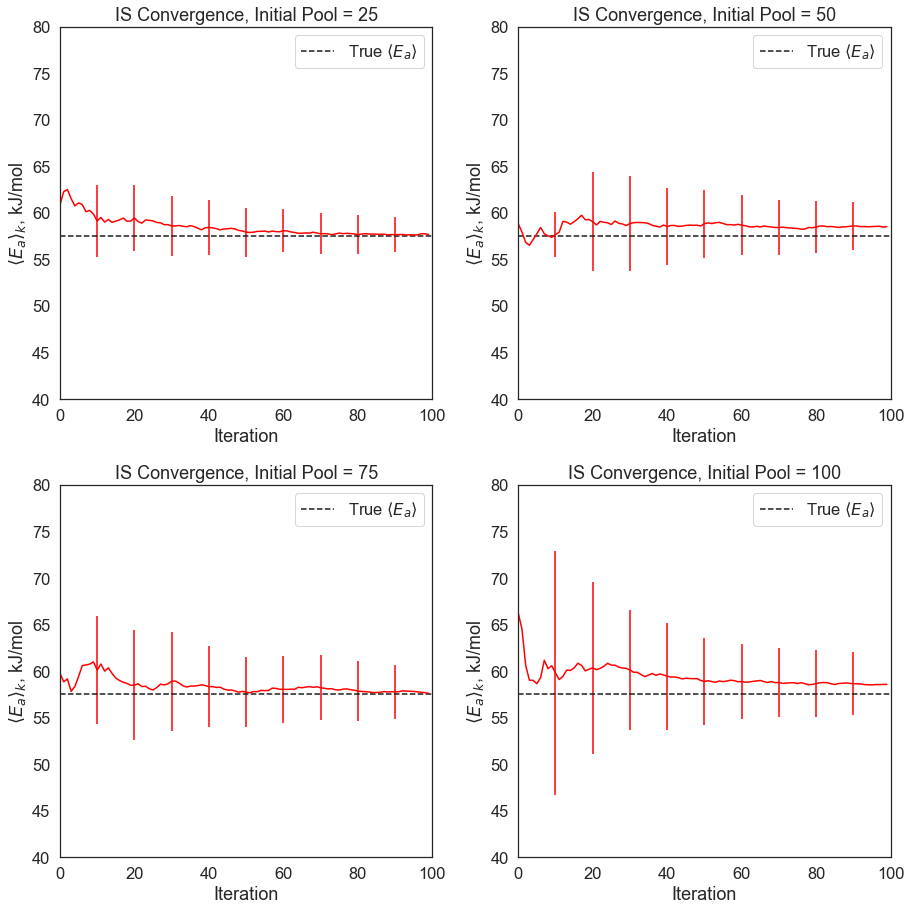

In [3]:
plt.rcParams['figure.figsize'] = 13, 13
plt.rcParams.update({'font.size': 18})

fig = plt.figure()
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    il_gaussian = ila.Parser('logs/morse_potential_{}.json'.format(ini_pool_size[i]))

    avg_Ea_exact = il_gaussian.true_site_avg_Ea()
    avg_Ea_pred = il_gaussian.all_site_avg_Ea()
    avg_Ea_pred_err = il_gaussian.all_site_Ea_sampling_error()
    n_iterations =il_gaussian.n_iterations

#     plt.subplot(2,2,i+1)
    plt.title('IS Convergence, Initial Pool = {}'.format(ini_pool_size[i]))
    ilp.plot_convergence(ax, n_iterations, avg_Ea_pred, avg_Ea_pred_err, avg_Ea_exact, 10)
    ax.set_ylim(bottom=40, top=80)
fig.tight_layout()
plt.show()
    


# Final Iteration

## Model Distributions

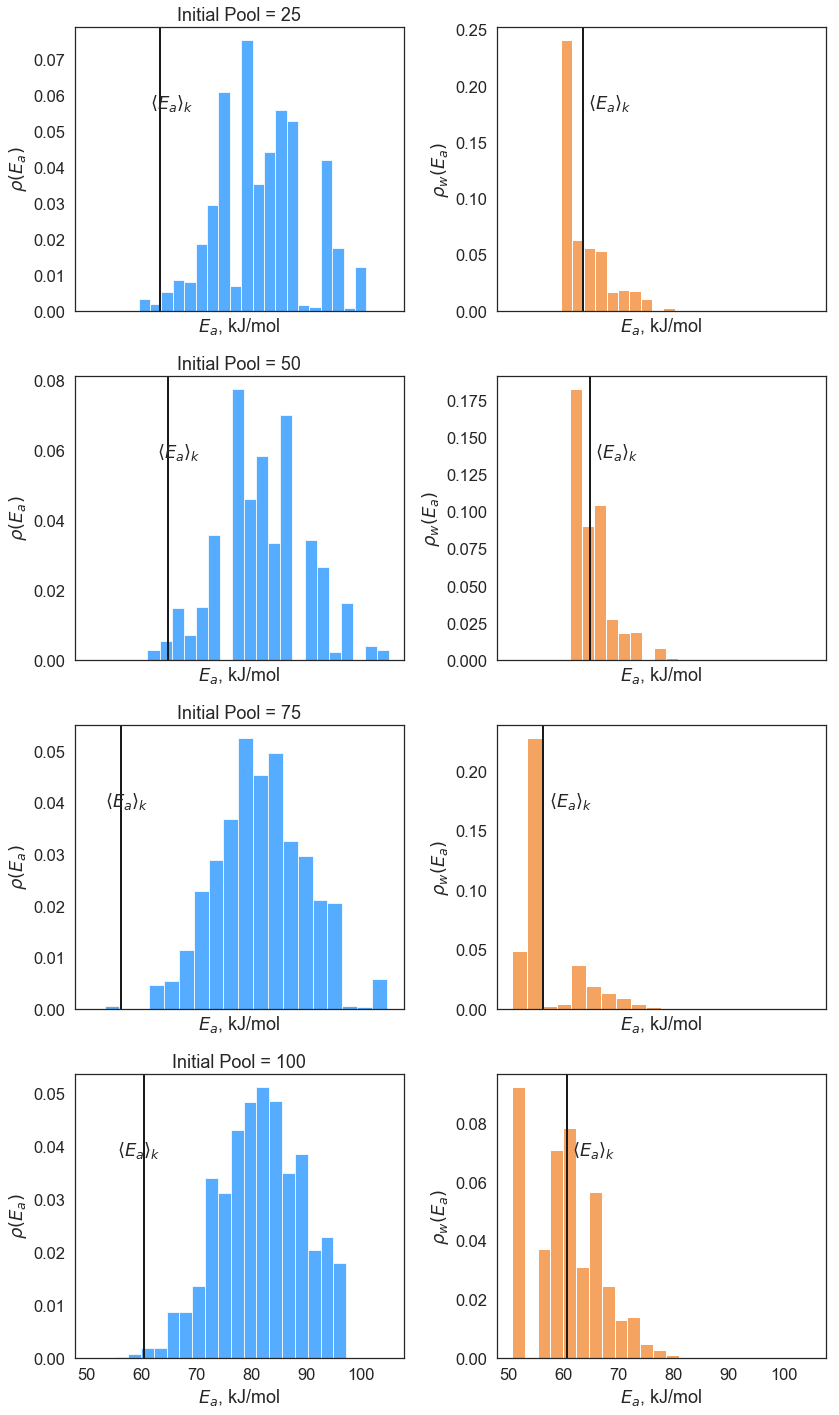

In [9]:
fig, axs = plt.subplots(4, 2, figsize=(12,20), sharex=True)
iteration = 15
for i in range(4):
    il_gaussian = ila.Parser('logs/morse_potential_{}.json'.format(ini_pool_size[i]))
    model_heights = il_gaussian.model_barrier_heights(iteration)
    sampled_sites = il_gaussian.sampled_sites(iteration)
    axs[i, 0].title.set_text('Initial Pool = {}'.format(ini_pool_size[i]))
    ilp.histogram(axs[i, 0], axs[i, 1], model_heights, il_gaussian.T(), 20)

plt.tight_layout()

In [5]:
il_gaussian = ila.Parser('logs/morse_potential_50.json')

iteration = 0
initial_pool = il_gaussian.sampled_sites(0)
il_gaussian_0 = ila.Parser('logs/morse_potential_50.json')
model_heights_0 = il_gaussian.model_barrier_heights(iteration)
sampled_sites_0 = il_gaussian.sampled_sites(iteration)

iteration = 1
initial_pool = il_gaussian.sampled_sites(0)
il_gaussian_1 = ila.Parser('logs/morse_potential_50.json')
model_heights_1 = il_gaussian.model_barrier_heights(iteration)
sampled_sites_1 = il_gaussian.sampled_sites(iteration)

iteration = 25
initial_pool = il_gaussian.sampled_sites(0)
il_gaussian_25 = ila.Parser('logs/morse_potential_50.json')
model_heights_25 = il_gaussian.model_barrier_heights(iteration)
sampled_sites_25 = il_gaussian.sampled_sites(iteration)

## Model fit + Residual distribution
For paper figure

Iteartion 0 standard deviation: 0.9 kJ/mol


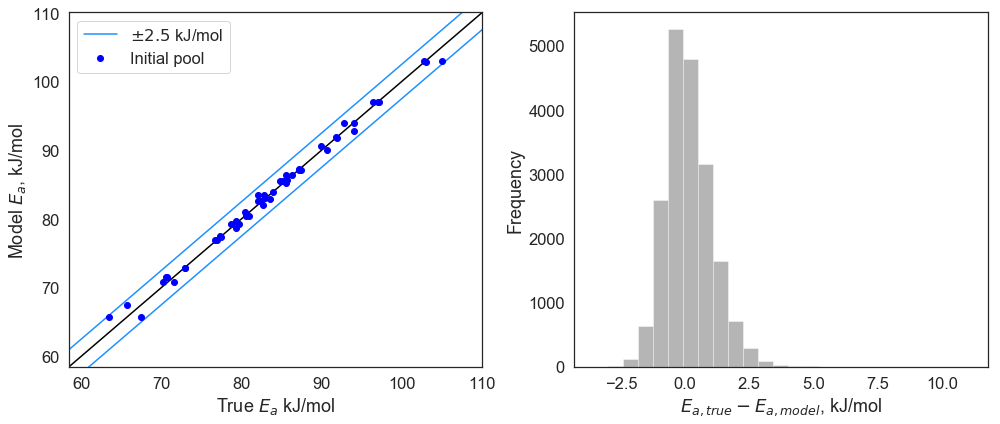

In [8]:
iteration = 30
il_morse = ila.Parser('logs/morse_potential_50.json')
sampled_sites_iteration = il_gaussian.sampled_sites(iteration)

model_heights = il_morse.model_barrier_heights(0)

fig, axes = plt.subplots(1, 2, figsize=(14,6))


initial_pool = il_morse.sampled_sites(0)
true_barriers = il_morse.true_barrier_heights()
# plt.title('Iteration 0, Initial Pool = {}'.format(ini_pool_size[i]))
ilp.plot_trained(axes[0], il_morse.model_training_barrier_heights(0), true_barriers[initial_pool], 2.5, 50)


sns.distplot(true_barriers - model_heights_iteration, ax=axes[1], kde=False, color='#474747', bins=25)
print("Iteartion {} standard deviation: {:.1f} kJ/mol".format(0, np.std(model_heights_iteration - true_barriers)))

# axes[0].set_xlabel(r'$E_{a,true} - E_{a,model}$, kJ/mol')
axes[1].set_xlabel(r'$E_{a,true} - E_{a,model}$, kJ/mol')
axes[1].set_ylabel('Frequency')

plt.tight_layout()


# Spikey model predicted $\rho(E_a)$

A lot of the model predicted activation energy distributions get the correct shape but are very spikey. A guess for why this happens is because the MLKR model is not good at extrapolating because the kernel is a Gaussian function that dies off very quickly. If there are gaps in $\rho(E_a)$ of the initial pool, the model will have a hard time interpolating between large gaps and there will probably be gaps in the model predicted $\rho(E_a)$ , 

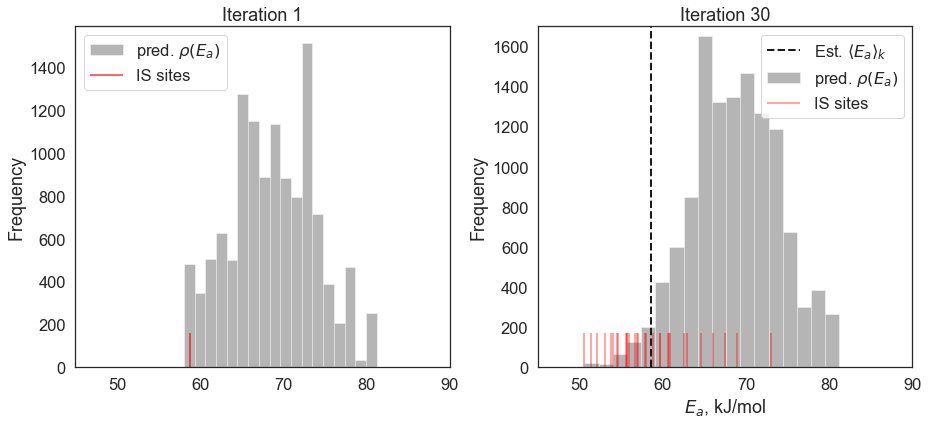

58.638226240925


In [42]:
n_bins = 18
iteration = 30

il_morse = ila.Parser('logs/morse_potential_50.json')

initial_pool = il_morse.sampled_sites(0)
model_heights_1 = il_morse.model_barrier_heights(1)
sampled_sites_1 = il_morse.sampled_sites(1)

model_heights_iteration = il_morse.model_barrier_heights(iteration)
sampled_sites_iteration = il_morse.sampled_sites(iteration)


fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13, 6))
axes[0].set_xlim([45, 90])
# Left Plot
sns.distplot(model_heights_1, ax=axes[0], kde=False, bins=n_bins, color="#474747", label=r'pred. $\rho(E_a)$')
# sns.distplot(il_morse.true_barrier_heights()[initial_pool], ax=axes[0], hist=False,
#             bins=n_bins, kde=False, rug=True, color='b',
#             rug_kws={"linewidth": 2, "height":0.1, "alpha":0.5}, label="Initial pool", )

sns.distplot(il_morse.true_barrier_heights()[sampled_sites_1[ini_pool_size[1]:]], hist=False, ax=axes[0], 
             bins=n_bins, color="red", kde=False, rug=True, 
             rug_kws={"linewidth": 2, "height":0.1, "alpha":0.6}, label="IS sites")


# Right Plot
sns.distplot(model_heights_iteration, ax=axes[1], kde=False, bins=n_bins, color="#474747", label=r'pred. $\rho(E_a)$')
# sns.distplot(il_morse.true_barrier_heights()[initial_pool], ax=axes[1], hist=False,
#             bins=n_bins, kde=False, rug=True, color='b',
#             rug_kws={"linewidth": 2, "height":0.1, "alpha":0.5}, label="Initial pool")

sns.distplot(il_morse.true_barrier_heights()[sampled_sites_iteration[ini_pool_size[1]:]], hist=False, ax=axes[1], 
             bins=n_bins, color="red", kde=False, rug=True, 
             rug_kws={"linewidth": 2, "height":0.1, "alpha":0.35}, label="IS sites")

axes[1].plot([58.63822, 58.63822],[0, 1700], '--', linewidth=2, color='k', label=r'Est. $\langle E_a \rangle_k$')
axes[0].set_title(r'Iteration 1')
axes[1].set_title(r'Iteration {}'.format(iteration))
axes[1].set_ylim([0, 1700])
# axes[2].set_title(r'Initial pool $\rho(E_a)$')

axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('Frequency')

# axes[0].set_xlabel(r'$E_a$, kJ/mol')
axes[1].set_xlabel(r'$E_a$, kJ/mol')

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

print(il_morse.all_site_avg_Ea()[29])

The gaps in the distribution are clearly correlated with a lack of sampling. If the bin count is reduced so the bin width is greater the $E_a$ gap, the spikes vanish

Iteartion 1 standard deviation: 1.2 kJ/mol
Iteartion 30 standard deviation: 0.9 kJ/mol


Text(0.5, 1.0, 'Iteration 30')

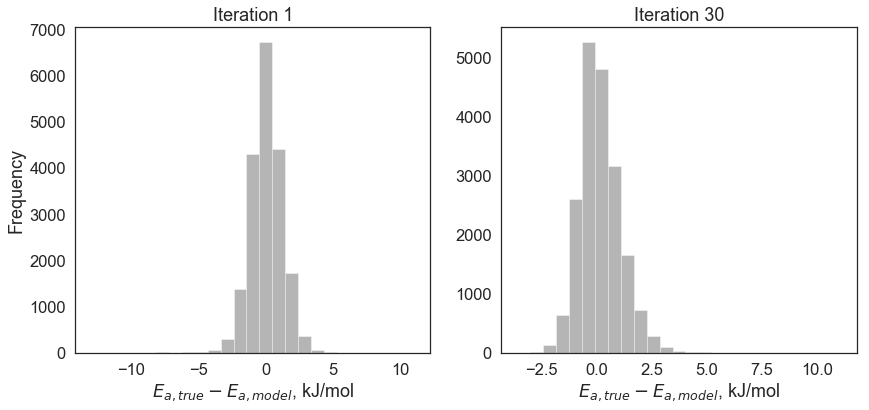

In [29]:
iteration = 30
il_morse = ila.Parser('logs/morse_potential_50.json')

model_heights_1 = il_morse.model_barrier_heights(1)
model_heights_iteration = il_morse.model_barrier_heights(iteration)

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.distplot(il_morse.true_barrier_heights() - model_heights_1, ax=axes[0], kde=False, color='#474747', bins=25)
print("Iteartion 1 standard deviation: {:.1f} kJ/mol".format(np.std(model_heights_1 - il_morse.true_barrier_heights())))

sns.distplot(il_morse.true_barrier_heights() - model_heights_iteration, ax=axes[1], kde=False, color='#474747', bins=25)
print("Iteartion {} standard deviation: {:.1f} kJ/mol".format(iteration, np.std(model_heights_iteration - il_morse.true_barrier_heights())))

axes[0].set_xlabel(r'$E_{a,true} - E_{a,model}$, kJ/mol')
axes[1].set_xlabel(r'$E_{a,true} - E_{a,model}$, kJ/mol')
axes[0].set_ylabel('Frequency')

# axes[0].set_xlim([-3, 3])
# axes[1].set_xlim([-3, 3])


axes[0].set_title('Iteration 1')
axes[1].set_title('Iteration {}'.format(iteration))

## Warmup

In the first ~10 importance sample iterations, the distribution range is still underestimated, so the k-weighted avg gets over estimated. If the first 5-10 importance sampled sites are discarded, the average improves

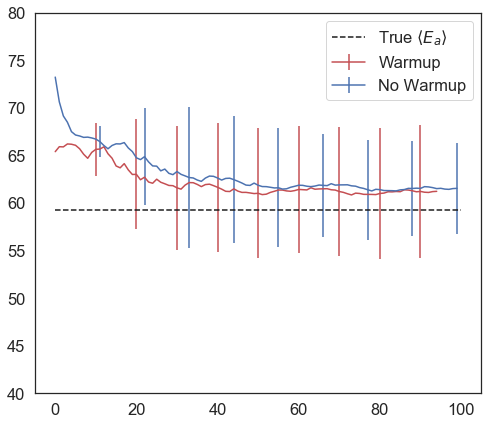

63.159441148665884 61.23037097786933


In [24]:
il_gaussian = ila.Parser('logs/morse_potential_50.json')
avg_Ea_pred = il_gaussian.all_site_avg_Ea()
avg_Ea_exact = il_gaussian.true_site_avg_Ea() + 50
IS_energy = [il_gaussian.IL_dict['importance-learning'][str(i)]['True Barrier'] for i in range(100)]
avg_Ea_pred_err = il_gaussian.all_site_Ea_sampling_error()

warmup_avg = []
warmup_error = []

n_warmup = 5

for i in range(n_warmup + 1, 101):
    warmup_avg.append(np.mean(IS_energy[n_warmup:i]))
    warmup_error.append(np.std(IS_energy[n_warmup:i]))

fig, ax = plt.subplots(1, 1, figsize=(8, 7))    

ax.plot([0, 100], [avg_Ea_exact, avg_Ea_exact], c='k', linestyle='--', label=r'True $\langle E_a \rangle$')
ax.errorbar(np.arange(100 - n_warmup), np.asarray(warmup_avg), yerr=np.asarray(warmup_error), errorevery=10, c='r', label='Warmup')
ax.errorbar(np.arange(100), avg_Ea_pred, yerr=avg_Ea_pred_err, errorevery=11, c='b', label='No Warmup')
ax.set_ylim(bottom=40, top=80)
plt.legend()
plt.show()
print(np.mean(avg_Ea_pred), warmup_avg[-1])


## Identifying Unimportant Coordinates
The absolute value of diagonal elements in the Mahalanobis distance matrix can help identify important and unimportant local coordinates. Large elements have large contributions to computing the adsorption energy, while small values are unimportant.

The local coordinates are:
![]("logs/local_coordinates-01.png")


The order of the coordinates are
1. OH-OH distance
2. Siloxane-Siloxane distance
3. Angle between OH-Siloxane vectors
4. Distance between midpoint of OH-Siloxane vectors

In [4]:
il_gaussian = ila.Parser('logs/morse_potential_50.json')
M = il_gaussian.model_coefficients(0)

M_df = pd.DataFrame({'d(OH-OH)':M[:,0], 'd(Siloxanes)' : M[:,1], r'$\theta$' : M[:,2], r'd(OH-Siloxane)' : M[:,3]})
M_df

,d(OH-OH),d(Siloxanes),$\theta$,d(OH-Siloxane)
0,5970138,-5919316,2010,-86113
1,-5919316,5912503,-2342,129719
2,2010,-2342,13,-310
3,-86113,129719,-310,49707


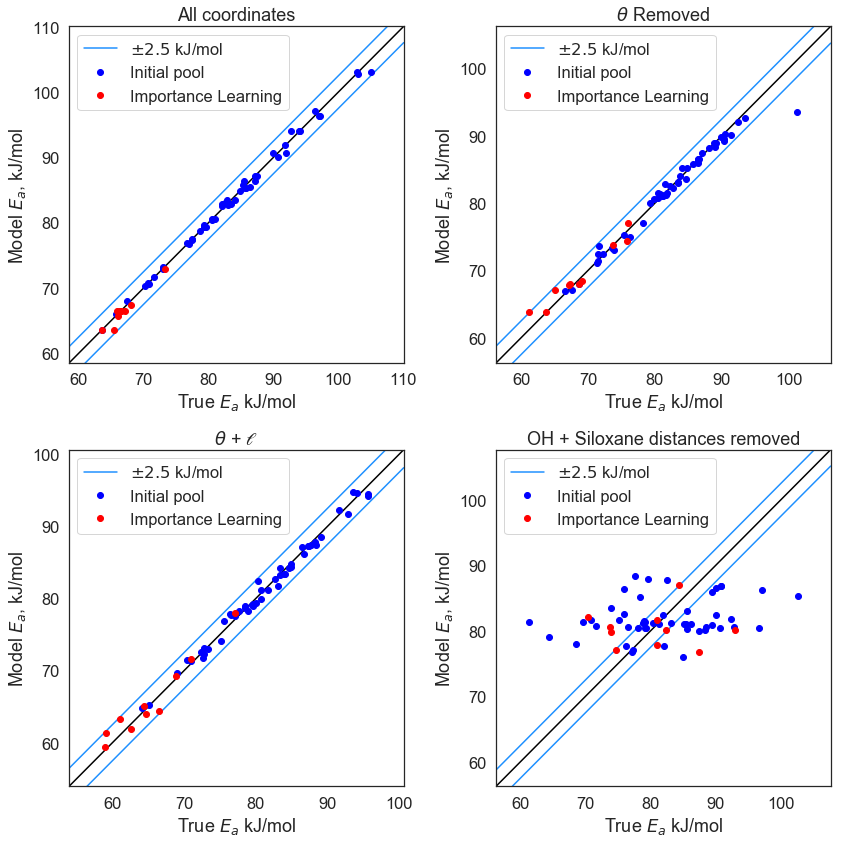

All coordinates standard deviation: 1.2824138225362893 kJ/mol
$\theta$ Removed standard deviation: 1.3311808496379454 kJ/mol
$\theta$ + $\scrl$ standard deviation: 1.3469992766967054 kJ/mol
OH + Siloxane distances removed standard deviation: 8.652543859764734 kJ/mol


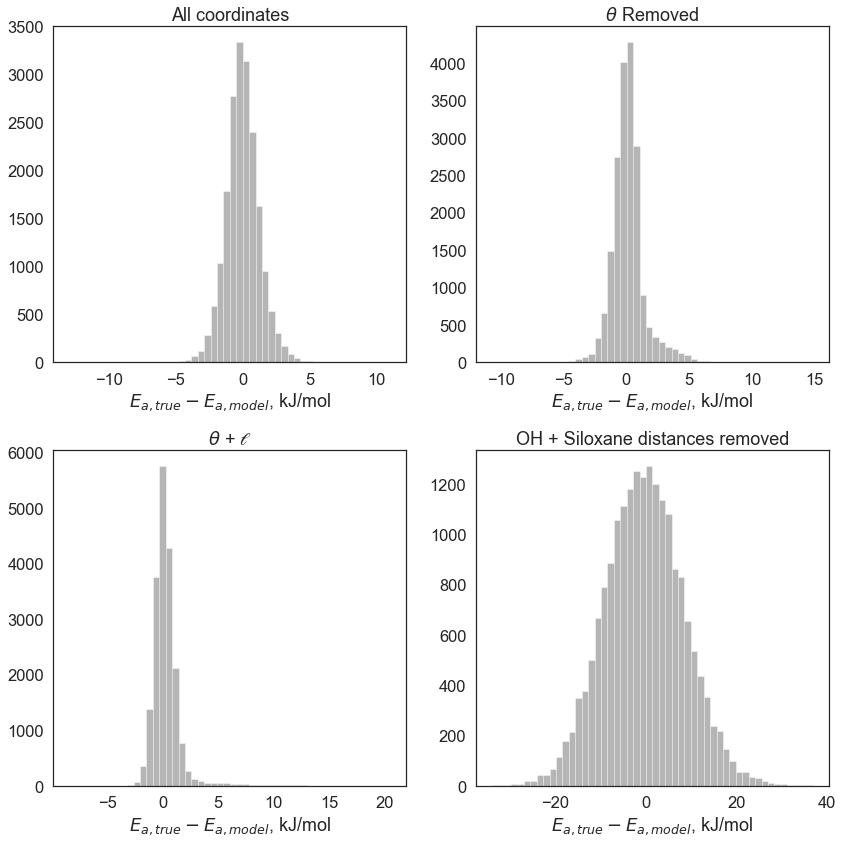

In [28]:
fnames = ['morse_potential_50.json', 'morse_potential_3_coords_50.json', 
          'morse_potential_2_coords_50.json', 'morse_potential_2_bad_coords_50.json']

titles = ['All coordinates', r'$\theta$ Removed', r'$\theta$ + $\scrl$',
         'OH + Siloxane distances removed']

fig = plt.figure(figsize=(12,12))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    il_morse = ila.Parser('logs/{}'.format(fnames[i]))
    model_heights = il_morse.model_training_barrier_heights(10)
    initial_pool = il_morse.sampled_sites(10)
    true_barriers = il_morse.true_barrier_heights()
    plt.title('{}'.format(titles[i]))
    ilp.plot_trained(ax, model_heights, true_barriers[initial_pool], 2.5, 50)

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,12))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    il_morse = ila.Parser('logs/{}'.format(fnames[i]))
    model_heights = il_morse.model_barrier_heights(10)
    true_barriers = il_morse.true_barrier_heights()
    sns.distplot(true_barriers - model_heights, ax=ax, kde=False, color='#474747')
    ax.set_xlabel(r'$E_{a,true} - E_{a,model}$, kJ/mol')
    plt.title('{}'.format(titles[i]))
    print('{} standard deviation: {} kJ/mol'.format(titles[i], np.std(true_barriers - model_heights)))
    del ax
    
plt.tight_layout()
plt.show()

In [15]:
np.min((true_barriers, model_heights))
np.max((true_barriers, model_heights))

116.13228182410387

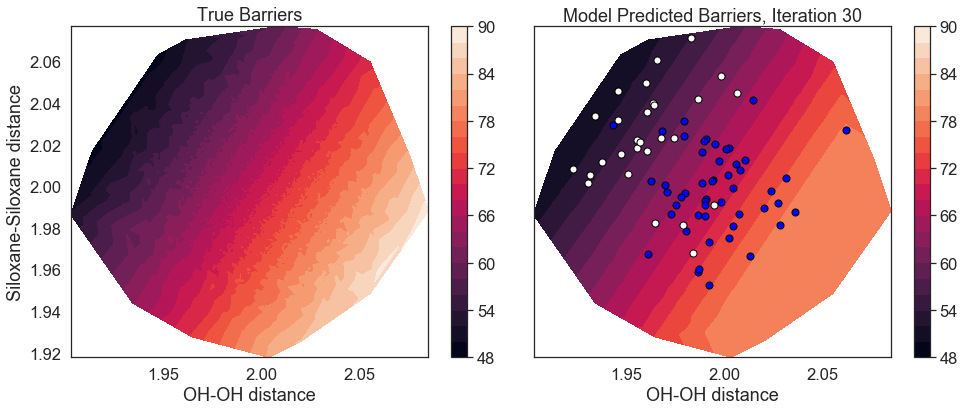

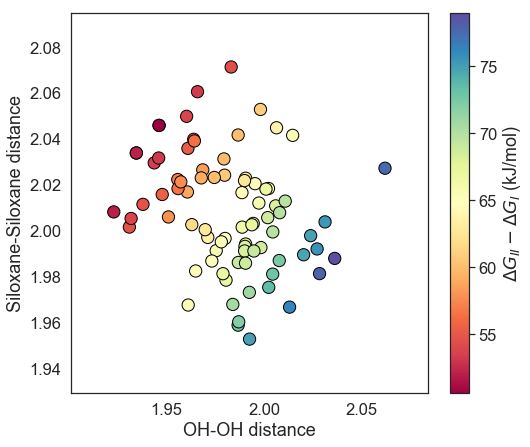

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

iteration = 30

il_morse = ila.Parser('logs/morse_potential_2_coords_{}.json'.format(50))
local_coordinates = il_morse.local_coordinates()
true_barriers = il_morse.true_barrier_heights()
model_heights = il_morse.model_barrier_heights(iteration)

sampled_local_coordinates = il_morse.sampled_local_coordinates(iteration)
initial_pool = il_morse.sampled_local_coordinates(0)
initial_pool_barriers = il_morse.sampled_barrier_heights(0)


min_barrier = np.min((true_barriers, model_heights))
max_barrier = np.max((true_barriers, model_heights))

axs[0].set_title('True Barriers')
tri1 = axs[0].tricontourf(local_coordinates[:,0], local_coordinates[:, 1], true_barriers, 20, 
                   vmin=min_barrier, vmax=max_barrier)
axs[0].set_xlabel('OH-OH distance')
axs[0].set_ylabel('Siloxane-Siloxane distance')
fig.colorbar(tri1, ax=axs[0])


axs[1].set_title('Model Predicted Barriers, Iteration {}'.format(iteration))
tri2 = axs[1].tricontourf(local_coordinates[:,0], local_coordinates[:, 1], model_heights, 11, 
                   vmin=min_barrier, vmax=max_barrier)
axs[1].scatter(initial_pool[:,0], initial_pool[:,1], s=50, c='blue', edgecolors='black', label='Initial Pool')
axs[1].scatter(sampled_local_coordinates[50:,0], sampled_local_coordinates[50:,1], s=50, c='w', edgecolors='black', label='Importance Sampled')
axs[1].set_xlabel('OH-OH distance')


# plt.legend()
# axs[1].set_ylabel('Siloxane-Siloxane distance')
fig.colorbar(tri1, ax=axs[1])

# plt.colorbar([tri1, tri2], ax=axes.ravel().tolist())

plt.tight_layout()
plt.show()




plt.figure()
plt.scatter(sampled_local_coordinates[:,0], sampled_local_coordinates[:,1], c=il_morse.sampled_barrier_heights(iteration), s=150, cmap='Spectral', edgecolors='black')
plt.xlabel('OH-OH distance')
plt.ylabel('Siloxane-Siloxane distance')
cbar = plt.colorbar()
cbar.set_label(r'$\Delta G_{II}-\Delta G_{I}$ (kJ/mol)')
plt.rcParams['figure.figsize'] = 8, 7
plt.rcParams['font.size'] = 16
plt.show()




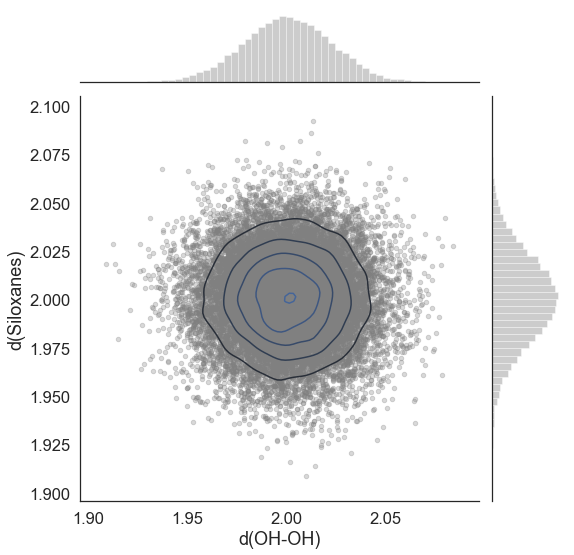

In [38]:
local_coord_df = pd.DataFrame({'d(OH-OH)':local_coordinates[:,0], 'd(Siloxanes)' : local_coordinates[:,1]})
sns.jointplot(x="d(OH-OH)", y="d(Siloxanes)", data=local_coord_df,
              color='grey', s=20, alpha=0.3, height=8).plot_joint(sns.kdeplot, zorder=1, shade=False, n_levels=5)
# plt.colorbar()
plt.show()

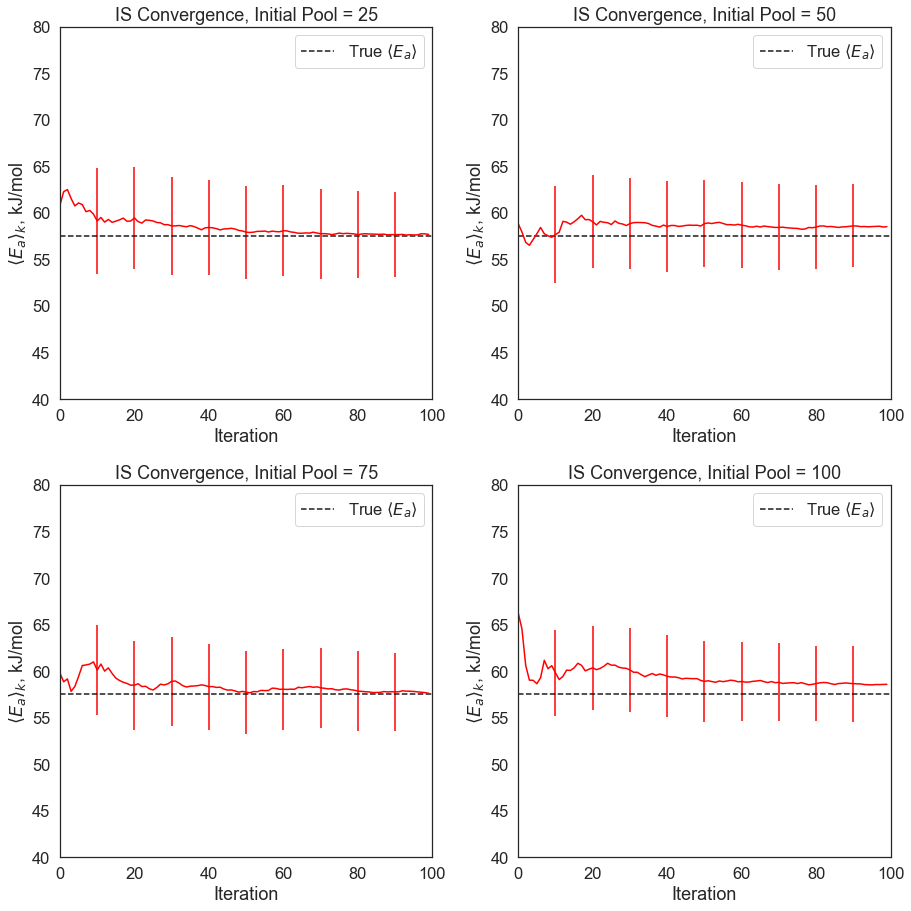

In [10]:
plt.rcParams['figure.figsize'] = 13, 13
plt.rcParams.update({'font.size': 18})

fig = plt.figure()
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    il_gaussian = ila.Parser('logs/morse_potential_{}.json'.format(ini_pool_size[i]))

    avg_Ea_exact = il_gaussian.true_site_avg_Ea()
    avg_Ea_pred = il_gaussian.all_site_avg_Ea()
    avg_Ea_pred_err = [il_gaussian.IL_dict['importance-learning'][str(x)]["Unbiased Sampling Error"] for x in range(100)]
    n_iterations =il_gaussian.n_iterations

#     plt.subplot(2,2,i+1)
    plt.title('IS Convergence, Initial Pool = {}'.format(ini_pool_size[i]))
    ilp.plot_convergence(ax, n_iterations, avg_Ea_pred, avg_Ea_pred_err, avg_Ea_exact, 10)
    ax.set_ylim(bottom=40, top=80)
fig.tight_layout()
plt.show()

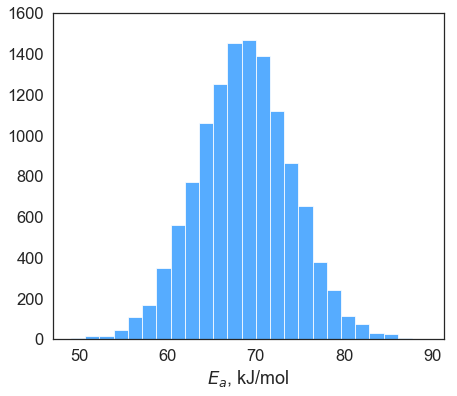

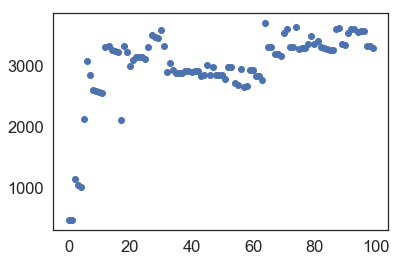

In [12]:
il_morse = ila.Parser('logs//morse_potential_50.json')

equiv = il_morse.N_equiv_sampling()
equiv

x = np.arange(len(equiv))
plt.scatter(x, equiv)
plt.show()

In [13]:
SE = il_morse.all_site_Ea_sampling_error()
il_morse.true_barrier_heights()
avg_Ea_pred = il_morse.all_site_avg_Ea()
equiv = ilp.equivalent_random_sampling(il_morse.true_barrier_heights(), 300, 0.05)
equiv

14510.352900863294

In [8]:
B = 1./(8.314/1000. * 300)
np.average(np.exp(-2 * B * il_morse.true_barrier_heights())) / np.average(np.exp(-B * il_morse.true_barrier_heights()))**2 * 0.05**(-2)

24190.57197346965

In [11]:
np.average(np.exp(-2 * B * il_morse.true_barrier_heights())) 

1.2416444710654152e-09